# <div id="instructions" style="border-radius: 5px; background-color:#f5f5f5;" >
<h1>Instructions</h1>
<p>Look for the <b>Your Turn</b> sections to complete the code and/or answer questions.<p>
</div>

# Lesson 3 Counts and Combinatorics


In this notebook we will explore count data and combinatorics. Event data is typically analyzed as counts for the number of each type of event that occurs. Determining the number of possible outcomes is key to computing the chances of an event occurring. This branch of mathematics is known as **combinatorics**.


### Counting and Combinatorics

Combinatorics is one of the biggest areas of mathematics. We apply combinatorics to compute the possible combinations or permutations of a combination of events. 

For example, we can use combinatorics to compute the number of possible sandwiches we can order at a sandwich shop with a limited menu: 4 bread choices, 5 meat choices, 4 toppings.  How many unique sandwich combination can we order by picking one item from each category?   

$$4 * 5 * 4 = 80$$

You can see that for this problem we just need to multiple the number of choices for each class. This is an example of the **multiplication principle** of combinatorics.

In the above example there is no dependency of our choice from one category to another. Consequently, we can find all of the possible combinations by simple multiplication. 

This is not always the case. Let's look at an example where each event changes the subsequent possible events. Let's say I go to a pub and I want to order a 4-beer taster, with each beer being unique. The pub has 10 beers on tap. How many possible choices do I have for my taster? Fortunately I know `python`, so I can use the `python` `itertools.combinations` function to build a table of all possible combinations of my 4-beer taster!

In [1]:
import numpy
import itertools
import pandas

In [2]:
c = numpy.array(list(itertools.combinations(range(10), 4)))
c.shape
c[:10]

array([[0, 1, 2, 3],
       [0, 1, 2, 4],
       [0, 1, 2, 5],
       [0, 1, 2, 6],
       [0, 1, 2, 7],
       [0, 1, 2, 8],
       [0, 1, 2, 9],
       [0, 1, 3, 4],
       [0, 1, 3, 5],
       [0, 1, 3, 6]])

The function builds a table of all combinations of 4 items chosen from a list of 10. The second dimension tells me the number of combinations present. 

### Sandwich combinatorics
 
 Let's investigate the sandwich shop example in a bit more detail. The code in the cell below creates three vectors containing the possible choices for bread, meat and topping. Execute this code.

In [7]:
##-----Sandwich Count----
breads = ['white', 'wheat', 'italian', 'sevengrain']
meats = ['ham', 'turkey', 'chicken', 'pastrami', 'meatballs']
toppings = ['mustard', 'mayo', 'salt_pepper', 'oil_vinegar']

To make our calculations simple, we can create a table or grid of all the possible sandwich choices. Execute the code in the cell below to create a grid or table of the possible sandwich choices, using the ```expand.grid``` function. 

In [8]:
next(itertools.product(breads, meats, toppings))

('white', 'ham', 'mustard')

In [9]:
sandwiches = pandas.DataFrame(
    list(itertools.product(breads, meats, toppings)), 
    columns=['breads', 'meats', 'toppings'])
print(len(sandwiches))
sandwiches.head(20)

80


,breads,meats,toppings
0,white,ham,mustard
1,white,ham,mayo
2,white,ham,salt_pepper
3,white,ham,oil_vinegar
4,white,turkey,mustard
5,white,turkey,mayo
6,white,turkey,salt_pepper
7,white,turkey,oil_vinegar
8,white,chicken,mustard
9,white,chicken,mayo


As expected, there are 80 possible sandwich types enumerated in the table.

***
In the cell below, added the sandwich shop example with three types of cheese added to the menu, cheddar, american, swiss. There are 240 unique sandwiches can you now order.
***

In [12]:
cheese = ['cheddar', 'american', 'swiss']

In [13]:
sandwiches = pandas.DataFrame(
    list(itertools.product(breads, meats, toppings, cheese)), 
    columns=['breads', 'meats', 'toppings', 'cheese'])
print(len(sandwiches))
sandwiches.head(20)

240


,breads,meats,toppings,cheese
0,white,ham,mustard,cheddar
1,white,ham,mustard,american
2,white,ham,mustard,swiss
3,white,ham,mayo,cheddar
4,white,ham,mayo,american
5,white,ham,mayo,swiss
6,white,ham,salt_pepper,cheddar
7,white,ham,salt_pepper,american
8,white,ham,salt_pepper,swiss
9,white,ham,oil_vinegar,cheddar


###  Factorials and permutations

Factorials are a way to compute the number of ways to order $N$ things. We use the term **Permutations** to describe the number of ways you can order some objects or events. This is where **factorials** arise:

$$Number\ of\ ways\ to\ order\ N\ things = N!$$  

Let's say you have 5 new books on probability you wish to put on a shelf (having read them cover-to-cover no doubt!). How many ways can you order them?  

$$5 * 4 * 3 * 2 * 1 = 5! = 120$$

This is another application of the multiplication principle. 

Easy enough, so far. But let's say we want to find the number of permutations of $k$ unique items chosen from $N$ total items. We can compute the number of possible permutations as:

$$\frac{N!}{(N - k)!}$$

Let's revisit our beer example. The order I drink my 4 beers in the sampler might matter. Maybe the tastes will be a bit different if I drink stout before I drink a red ale? We saw the number of combinations previously. But, since order matters, I have many more permutations:

$$\frac{10!}{(10 - 4)!} = 10 * 9 * 8 * 7 = 5040$$

****
### Your turn: 
Let's say I am going to order a 5-beer taster and I care about order. In the cell below create the code to compute how many permutations are there. Can you see how the number of permutations gets large rather quickly? 
****



In [28]:
def permutations(N):
    total = 1
    for i in range (N, 0, -1):
        total = N * permutations(N-1)
    
    return total    
        
permutations(5)    

120

### Computing factorials

Computing factorials can be tricky. A 64 bit unsigned integer can represent numbers as large as $2^{64} = 9.2E18$. However $21! = 5.1E19$. In practice, computation of factorials is done on ratios to make the problem tractable. For example, we just wrote our beer example in a tractable form:

$$\frac{10!}{6!} = \frac{10!}{(10-4)!} = 10 * 9 * 8 * 7$$

We never had to actually compute the largest number $10!$. In fact, we just multiplied 4 numbers. 

### Combinations

What if order does not matter? I may just want to find all unique combinations of k items of N choices. For example, for the beer example when order does not mater, there are $10$ choices and I want to pick $4$ unique choices. In the language of combinatorics, we say that the above quantity is $10$ **choose** $4$, which can be writen:

$$\frac{10!}{4!(10 - 4)!} = \binom{10}{4}$$

We say that $N$ choose $k$ is a **combinations** since order does not matter. More generally we compute combinations with the formula:

$$\frac{N!}{k!(N - k)!} = \binom{N}{k}$$

From these formulas you can see that combinations are less than permutations by a factor of $k!$.

For our example, we can visualize how this process works with **Pascal's triangle**. You can see an example below. 

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/PascalTriangleAnimated2.gif" alt="Pascal's triangle">

In this case we find $10$ choose $4$ by counting down 10 rows and over 4 elements. Voila! we have the value we expect! 

Notice that Pascal's triangle is symmetric. This illustrates an important symmetry property of combinations. Notice that:

$$\binom{N}{k} = \binom{N}{N-k}$$



***
### Your turn:
Use the `scipy.special.comb` function to compute the number of 4-beer tasters you could create from 10 taps. Use the <a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.comb.html">documentation</a> for more information.
***


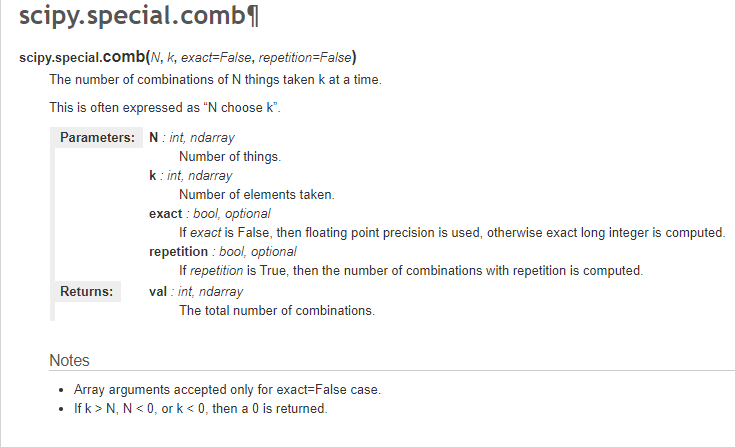

In [17]:
import scipy
import scipy.special

scipy.special.comb(10,4)#complete the missing arguments

210.0

***
**Fun note:** there are $52!$ ways to shuffle deck of cards, or combinations. It is likely that each shuffle is unique in the history of the world!
***

## Summary

In this notebook we have covered the following topics:

1. Factorials ($N!$) are the number of ways to order N things.
2. Permutations
  - Ordering matters!
  - The number of ways to order k things from N choices: 
  $$p(k,N) = \frac{k!}{(N - k)!}$$.
3. Combinations  
  - Ordering does not matter.
  - The number of ways to group (combinations) of k things from N choices:
  $$c(k,N) = \frac{N!}{k!(N - k)!} = \binom{N}{k}$$
  

<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5;" >
<h3>Reminder</h3>
<p>Use this notebook to answer the quiz questions related to the <b>Your Turn</b> sections.<p>
</div>